In [1]:
## Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sentence_transformers import SentenceTransformer
import spacy
import nltk
import re
import faiss
import folium
import torch




In [2]:
# pip install sentence-transformers

In [3]:
# !pip install faiss-cpu

### Load and Explore The Data 

In [4]:
jobs_df = pd.read_csv("../input/wuzzuf-jobs/Wuzzuf_Jobs.csv", sep=",")
jobs_df.head(12)

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"
5,Senior .NET Developer (Desktop Application),Dexef,Maadi,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"ASP.NET, Desktop Development, Information Tech..."
6,Preschool French Teacher,Leap Development Hub,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Education, Education/Teaching"
7,Junior Business Development Specialist (out door),E3mel Business for Financial & Managerial Cons...,Maadi,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Sales Target, Sales Skills, B2B Sales, B2C Sal..."
8,Indoor Sales Executive Furniture,Line Design,Nasr City,Full Time,Experienced,1-3 Yrs of Exp,Cairo,"sales skills, Sales/Retail"
9,Content Creator / Copy Writer - Alexandria,EL KHETA,Alexandria,Full Time,Entry Level,1+ Yrs of Exp,Egypt,"Copywriter, SEO, WordPress, Creative, Writing,..."


In [5]:
jobs_df.info(), jobs_df.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     4380 non-null   object
 1   Company   4380 non-null   object
 2   Location  4380 non-null   object
 3   Type      4380 non-null   object
 4   Level     4380 non-null   object
 5   YearsExp  4380 non-null   object
 6   Country   4380 non-null   object
 7   Skills    4380 non-null   object
dtypes: object(8)
memory usage: 273.9+ KB


(None, (4380, 8))

In [6]:
jobs_df.describe().T

,count,unique,top,freq
Title,4380,2965,Accountant,57
Company,4380,1534,Confidential,590
Location,4380,162,Cairo,563
Type,4380,6,Full Time,4168
Level,4380,9,Experienced,2198
YearsExp,4380,101,1-3 Yrs of Exp,414
Country,4380,42,Cairo,2230
Skills,4380,4227,"Corporate Sales, Real Estate, Advertising, Mar...",12


In [7]:
jobs_df.isnull().sum()

Title       0
Company     0
Location    0
Type        0
Level       0
YearsExp    0
Country     0
Skills      0
dtype: int64

In [8]:
jobs_df['Skills'].value_counts().to_frame()

,count
Skills,
"Corporate Sales, Real Estate, Advertising, Marketing, Sales Skills, Insurance, Sales Target, Outdoor Sales, Telesales, Property",12
"Logistics, SAP, Inventory, Store Keeping, Logistics/Supply Chain",11
"Sales Skills, Sales Target, Customer Services, Customer Care, Retail, Collection, Distribution, Selling Skills, Negotiation Skills",10
"Real Estate, Sales Skills, Sales Target, Outdoor Sales, Property, Customer Service, Customer Care, Customer Support, Advertising",9
"Finance, Sales Accounting, Commerce, Budget, Reporting, Accounting/Finance",9
...,...
"Social Media, English, Communication, Business Administration, Recruitment, HR, E-marketing, Human Resources",1
"Healthcare, medical, master, Medical/Healthcare",1
"Supply Chain, Warehousing, Purchasing, Administration, Operations, Vendor Management, Logistics/Supply Chain",1


In [9]:
jobs_df['Country'].value_counts().to_frame()

,count
Country,
Cairo,2230
Egypt,927
Giza,776
Alexandria,129
Sharqia,62
Saudi Arabia,51
Dakahlia,37
Gharbia,27
Red Sea,16


### Data Visualization

In [10]:

categories = jobs_df['Title'][0:20].unique()  
data = []

for category in categories:
    category_data = jobs_df.loc[jobs_df['Title'] == category].head(20)  
    data.append(go.Scatter(
        x=category_data.index,
        y=category_data['Country'],
        mode='markers',
        name=category,
        text=category_data['Title']
    ))

layout = go.Layout(
    title="Top 20 Job Titles by Country",
    xaxis=dict(title='Index'),
    yaxis=dict(title='Country'),
    hovermode='closest'
)

fig = go.Figure(data=data, layout=layout)

fig.show()


In [11]:

country_counts = jobs_df["Country"].value_counts()

fig = px.pie(
    values=country_counts.values,
    names=country_counts.index,
    title=" Distribution of Job Openings by Country.",
    labels={'names': 'Country', 'values': 'Count'},
    hole=0.3,
    opacity=0.7
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_font_size=20)

fig.show()


In [12]:
jobs_df['Company'].unique(),jobs_df['Company'].nunique()

(array(['Johnson Controls', 'SYE English Community', 'So Value Pharma',
        ..., 'Alexandria Building Center', 'Term',
        'Modern American School of Egypt 2000'], dtype=object),
 1534)

In [13]:


top_companies = jobs_df['Company'].value_counts().head(20).index[::-1]
counts = jobs_df['Company'].value_counts().head(20).values[::-1]

fig = go.Figure(go.Bar(
    y=top_companies,
    x=counts,
    orientation='h',
    marker=dict(color='rgba(50, 171, 96, 0.6)', line=dict(color='rgba(50, 171, 96, 1.0)', width=1)),
    ))

fig.update_layout(
    title='Top 20 Companies Eager to Hire',
    xaxis=dict(title='Number of job openings'),
    yaxis=dict(title='Company'),
    height=600,
    width=800,
    bargap=0.15,  
    bargroupgap=0.1 
)

fig.show()


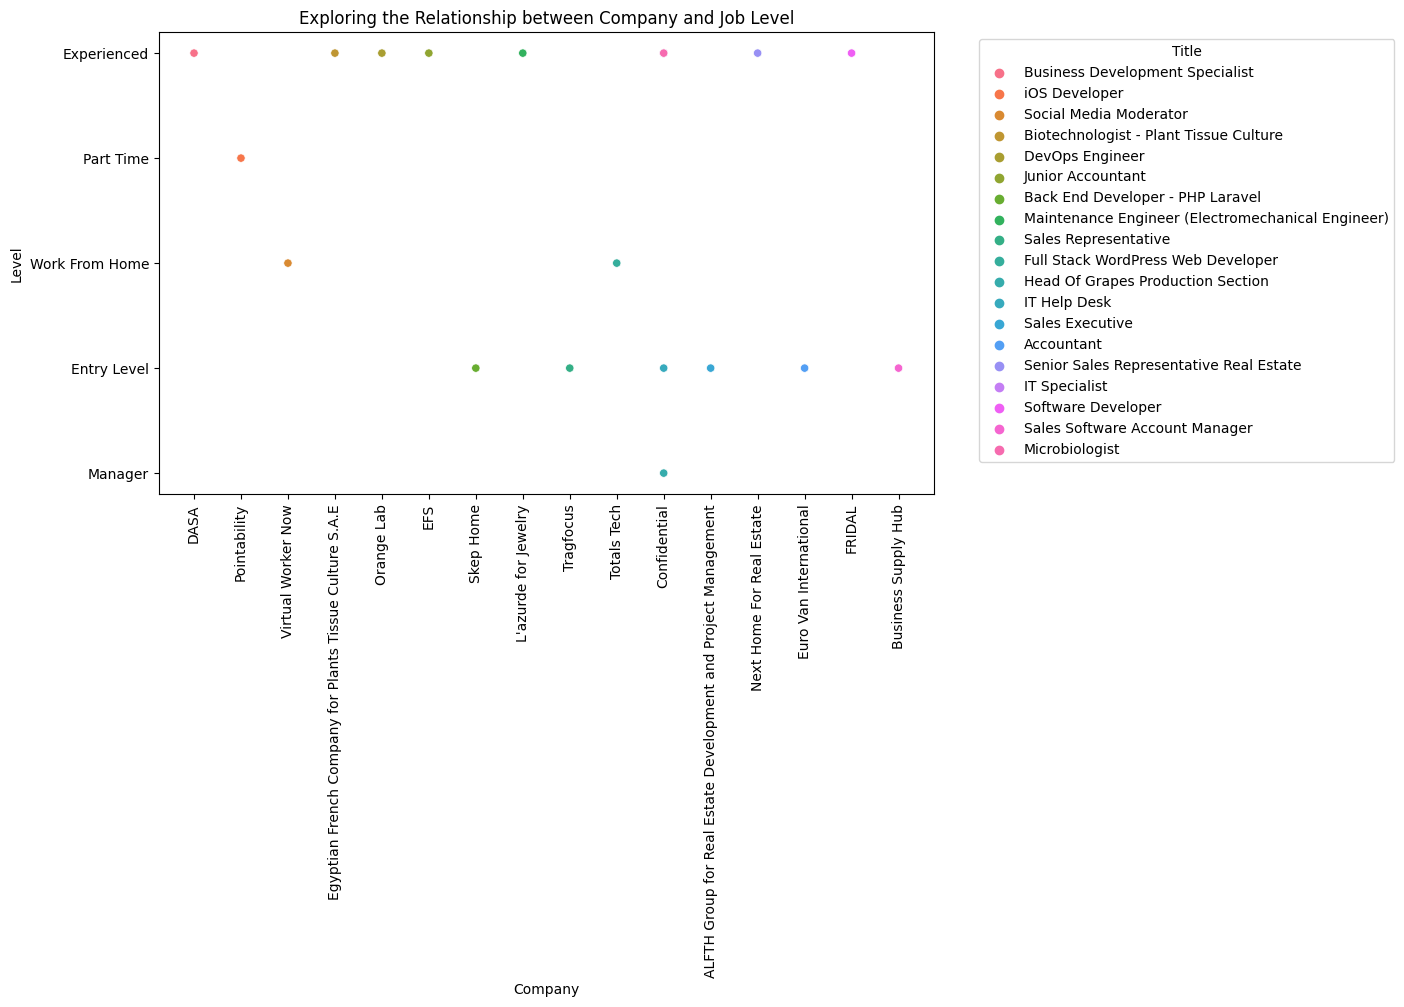

In [14]:
sample_data = jobs_df.sample(20)  
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Company', y='Level', hue='Title', data=sample_data)
plt.title('Exploring the Relationship between Company and Job Level')
plt.xlabel('Company')
plt.ylabel('Level')
plt.xticks(rotation=90) 
plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
 

In [15]:
#  Analyzing Company Distribution by Type
fig = px.histogram(jobs_df[:20], x='Type', title='Analyzing Company Distribution by Type', labels={'Type': 'Company'}, nbins=100)
fig.update_xaxes(title_text='Company')
fig.update_yaxes(title_text='Type')
fig.show() 


In [16]:
jobs_df['Location'].unique(),jobs_df['Location'].nunique()

(array([' New Cairo', ' Dokki', ' Cairo', ' Maadi', ' Nasr City',
        ' Alexandria', ' Helwan', ' 10th of Ramadan City',
        ' 6th of October', ' Giza', ' Heliopolis', ' Mahta Alraml',
        ' Glim', ' Mohandessin', ' Obour City', ' Doha', ' Damietta',
        ' Bourj Alarab', ' Tanta', ' New Assuit', ' Downtown', ' Sohag',
        ' Beni Suef', ' Jeddah', ' Badr City', ' Mansoura',
        ' Hadayek October', ' Sheraton', ' Haram', ' Faisal', ' Dubai',
        ' Quweisna', ' Santah', ' Marsa Matruh', ' Mandara', ' Katameya',
        ' Hadayek Alahram', ' Beheira', ' Salam City', ' Assiut',
        ' Mokattam', ' Zamalek', ' Riyadh', ' Alsadat City', ' Abu Rawash',
        ' Azarita', ' Lahore', ' Itajuba', ' Hurghada', ' Sheikh Zayed',
        ' Dakahlia', ' Gharbia', ' Zagazig', ' Sharqia', ' Ameria',
        ' Shubra', ' Aswan', ' Belbes', ' New Nozha', ' Farafra', ' Nozha',
        ' Menia', ' Smouha', ' Luxor', ' Qena', ' Minya', ' Fayoum',
        ' Lviv', ' Sidi Gaber'

In [17]:

egypt_coords = (26.8206, 30.8025)

m = folium.Map(location=egypt_coords, zoom_start=6)

# Define locations with coordinates
egypt_coordinates = [
    ([29.9870 ,31.2118], "Giza", "Click for info 1"),
    ([ 30.005493,31.477898], "New Cairo", "Click for info 2"),
    ([31.3525578,30.0603146], "Nasr City", "Click for info 3"),
    ([31.2769423, 29.9626961], "Maadi", "Click for info 4"),
    ([30.033333, 31.233334], "Cairo", "Click for info 5"),
    ([31.205753, 29.924526], "Alexandria", "Click for info 6"),
    ([29.07632100,31.09693000], "Beni Suef", "Click for info 7"),
    ([31.354343, 27.237316], "Matruh", "Click for info 8"),
    
     ([25.6872, 32.6396], "Luxor", "Click for info 9"),
     ([24.0889, 32.8998], "Aswan", "Click for info 10"),
     ([27.9158, 34.3297], "Sharm El Sheikh", "Click for info 11"),
     ([30.6043, 32.2723], "Ismailia", "Click for info 12"),
     ([31.0364, 31.3807], "Dakahlia", "Click for info 13"),
     ([25.6779, 28.8956], "New Valley", "Click for info 14"),
    
     ([28.1235, 30.7456], "Minya", "Click for info 15"),
     ([30.4714, 31.18446], "Qalubia", "Click for info 16"),
     ([30.7219, 30.9961], "Beheira", "Click for info 17"),
     ([27.1815, 31.1837], "Assiut", "Click for info 18"),
     ([31.4165, 31.8133], "Damietta", "Click for info 19"),
    ([30.0055, 32.5498], "Damietta", "Click for info 20"),
]



for coords, popup, tooltip in egypt_coordinates:
    folium.Marker(
        location=coords,
        popup=popup,
        tooltip=tooltip,
        icon=folium.Icon(color='red') 
    ).add_to(m)
m


### Data Preprocessing

In [18]:
jobs_df[" Skills"] = jobs_df["Title"] + " " + jobs_df["Company"] + " " + jobs_df["YearsExp"]
jobs_df.head()

,Title,Company,Location,Type,Level,YearsExp,Country,Skills,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ...",Customer Service Agent Johnson Controls 1-3 Yr...
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin...",Marketing Manager SYE English Community 5-10 Y...
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ...",Medical Representative Heliopolis So Value Pha...
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an...",Order Handling Specialist Johnson Controls 3-5...
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain",Storekeeper Confidential 3+ Yrs of Exp


In [19]:
def emoji(context):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    context = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', context)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    context = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', context)
    # Love -- <3, :*
    context = re.sub(r'(<3|:\*)', ' positiveemoji ', context)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    context = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', context)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    context = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', context)
    # Cry -- :,(, :'(, :"(
    context = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', context)
    return context


def process_text(context):
    context = text.lower()    
    context = re.sub('<[a-z]*>', '', contextxt)
    context = re.sub('<\/[a-z]*>', '', context)                                         # Lowercases the string
    context = re.sub('@[^\s]+', '', context)                              # Removes usernames
    context = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ',context)   # Remove URLs
    context = re.sub(r"\d+", " ", str(context))                           # Removes all digits
    context = re.sub('&quot;'," ", context)                               # Remove (&quot;) 
    context = emoji(text)                                              # Replaces Emojis
    context = re.sub(r"\b[a-zA-Z]\b", "", str(context))                   # Removes all single characters
    context = re.sub(r"[^\w\s]", " ", str(context))                       # Removes all punctuations
    context = re.sub(r'(.)\1+', r'\1\1', context)                         # Convert more than 2 letter repetitions to 2
    context = re.sub(r"\s+", " ", str(context))                           # Replaces double spaces with single space    
    return context


In [20]:
nlp = spacy.load("en_core_web_sm")

def preprocess_with_spacy(context):
    processed_texts = []
    for text in context:
     
        doc = nlp(text)
        
        preprocessed_words = [token.lemma_ for token in doc if not token.is_stop and len(token.text) > 1]
        
        processed_texts.append(' '.join(preprocessed_words))
    
    return processed_texts

# Example usage
preprocessed_texts = preprocess_with_spacy(["It is me,Olfat.", "And i am a ML engineer. "])
print(preprocessed_texts)

['Olfat', 'ML engineer']


In [21]:

jobs_df["Skills"] = jobs_df.Skills.apply(lambda context: preprocess_with_spacy([context])[0])
jobs_df.Skills.head(10).to_frame()

,Skills
0,Center Customer Support Customer Care English ...
1,Market Research Social Media Online Marketing ...
2,Cardio metabolic Sales Skills Sales Target Cus...
3,Supply Officer Supply Planner Procurement Logi...
4,Warehousing Storekeeping Logistics Supply Chain
5,ASP.NET Desktop Development Information Techno...
6,education Education Teaching
7,Sales Target Sales Skills B2B sale B2C Sales B...
8,sale skill Sales Retail
9,Copywriter SEO WordPress Creative writing Soci...


In [22]:

model = SentenceTransformer('all-MiniLM-L6-v2')

if torch.cuda.is_available():
   model = model.to(torch.device("cuda"))
print(model.device)

embeddings = model.encode(jobs_df.Skills.to_list(), show_progress_bar=True)

cuda:0


Batches:   0%|          | 0/137 [00:00<?, ?it/s]

In [23]:
# Faiss uses only 32-bit floating point matrices. --> convert to "float32"

embeddings = np.array([embedding for embedding in embeddings]).astype("float32")

index = faiss.IndexFlatL2(embeddings.shape[1]) 
index.add(embeddings)

In [24]:
# Retrieve the 10 nearest neighbours
job_id = 89
print(jobs_df.iloc[job_id, 2])
D, I = index.search(np.array([embeddings[job_id]]), k=10)
jobs_df.iloc[I.tolist()[0]]

 Cairo


,Title,Company,Location,Type,Level,YearsExp,Country,Skills,Skills
89,Pre-Sales Executive / IT Field,Integrated Technology Group,Cairo,Full Time,Experienced,4-6 Yrs of Exp,Egypt,Computer Science Sales Skills Sales Target Sal...,Pre-Sales Executive / IT Field Integrated Tech...
2680,Sales Representative,Computer Consulting & Supplies,Zamalek,Full Time,Experienced,2-3 Yrs of Exp,Cairo,Computer Hardware Sales Skills Sales Target Co...,Sales Representative Computer Consulting & Sup...
1901,Senior IT Sales Representative,CST Systems,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,Software Sales Skills Sales Target English Com...,Senior IT Sales Representative CST Systems 3-5...
191,IT Sales Specialist,PIXEL,Haram,Full Time,Experienced,2+ Yrs of Exp,Giza,Computer Science Installation Selling Sales Sk...,IT Sales Specialist PIXEL 2+ Yrs of Exp
3417,IT Sales Specialist,Altayar recruitment,Riyadh,Full Time,Experienced,2+ Yrs of Exp,Saudi Arabia,sale Skills Sales Target Customer Support Soft...,IT Sales Specialist Altayar recruitment 2+ Yrs...
3188,IT Sales Engineer,cloud4rain,6th of October,Full Time,Experienced,3-5 Yrs of Exp,Giza,sale Skills Computer Science English B2B Sales...,IT Sales Engineer cloud4rain 3-5 Yrs of Exp
3841,Sales Account Manager,SilverLinks,New Cairo,Full Time,Experienced,4+ Yrs of Exp,Cairo,sale Skills Sales Target Information Technolog...,Sales Account Manager SilverLinks 4+ Yrs of Exp
306,Software Sales Specialist,Akhenaton Techology,Maadi,Full Time,Experienced,2-5 Yrs of Exp,Cairo,sale Skills Sales Target Software Communicatio...,Software Sales Specialist Akhenaton Techology ...
1860,Business Development Manager,Confidential,6th of October,Full Time,Manager,5+ Yrs of Exp,Giza,Software Sales Skills Sales Target Marketing M...,Business Development Manager Confidential 5+ Y...
496,Software Sales Account Manager - Internship,AFKAR Technology,New Cairo,Internship,Entry Level,null Yrs of Exp,Cairo,sale Target Communication Skills English Sales...,Software Sales Account Manager - Internship AF...


In [25]:
job_id = 30
print(jobs_df.iloc[job_id, 2])
D, I = index.search(np.array([embeddings[job_id]]), k=10)
jobs_df.iloc[I.tolist()[0]]

 6th of October


,Title,Company,Location,Type,Level,YearsExp,Country,Skills,Skills
30,Industrial Engineer,Longman Egypt,6th of October,Full Time,Experienced,5-7 Yrs of Exp,Giza,Industrial Engineering Production Skills Mecha...,Industrial Engineer Longman Egypt 5-7 Yrs of Exp
3808,Production Engineer,Elif Global,6th of October,Full Time,Entry Level,0-3 Yrs of Exp,Giza,production Mechanical Engineering Management M...,Production Engineer Elif Global 0-3 Yrs of Exp
3912,Sales Production Engineer (Sheet Metal),Promech Engineering,Maadi,Full Time,Experienced,2-5 Yrs of Exp,Cairo,sale Mechanical Engineering Sheet Metal Produc...,Sales Production Engineer (Sheet Metal) Promec...
2108,Process Engineer,3Brothers,10th of Ramadan City,Full Time,Experienced,2-5 Yrs of Exp,Sharqia,Mechanical Engineering Production Quality Engl...,Process Engineer 3Brothers 2-5 Yrs of Exp
383,Mechanical Production Engineer,Gila Electric,10th of Ramadan City,Full Time,Experienced,3-4 Yrs of Exp,Sharqia,Production Engineering Manufacturing Manufactu...,Mechanical Production Engineer Gila Electric 3...
347,Production Manager,French Company for Porcelain,Beni Suef,Full Time,Manager,10+ Yrs of Exp,Egypt,production Manufacturing Engineering Operation...,Production Manager French Company for Porcelai...
2987,Factory Manager,Confidential,Cairo,Full Time,Manager,15+ Yrs of Exp,Egypt,production Manufacturing Engineering Operation...,Factory Manager Confidential 15+ Yrs of Exp
4065,Utilities Section Head - Qalyubia,Lactalis Halawa,Qalyub,Full Time,Manager,7-15 Yrs of Exp,Qalubia,utility Mechanical Engineering Electrical Engi...,Utilities Section Head - Qalyubia Lactalis Hal...
3498,Mechanical Production Engineer,New City Glass,10th of Ramadan City,Full Time,Experienced,5+ Yrs of Exp,Cairo,Mechanical Engineering Project Management Manu...,Mechanical Production Engineer New City Glass ...
1935,Oracle EBS Manufacturing Specialist,Elsewedy industries,10th of Ramadan City,Full Time,Experienced,2+ Yrs of Exp,Cairo,manufacturing Production Computer Science Soft...,Oracle EBS Manufacturing Specialist Elsewedy i...


In [26]:
# user_query = "Software Engineer"
def get_user_query():
    return input("Enter Your Query: ")
def search_jobs_by_query(query, model, index, num_results=20):
    """Tranforms query to vector using a pretrained, sentence-level
    DistilBERT model and finds similar vectors using FAISS.
    
    Args:
        query (str): User query that should be more than a sentence long.
        model (sentence_transformers.SentenceTransformer.SentenceTransformer)
        index (`numpy.ndarray`): FAISS index that needs to be deserialized.
        num_results (int): Number of results to return.
    
    Returns:
         The titles based on the paper index.
    """
    vector = model.encode(list(query))
    distance, ID = index.search(np.array(vector).astype("float32"), k=num_results)
    
    return [list(jobs_df[jobs_df.index == idx]['Title']) for idx in ID[0]]

user_query=get_user_query()
   
# Querying the index
search_results = search_jobs_by_query([user_query], model, index, num_results=20)
search_results


Enter Your Query:  Software Engineer


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[['Instructional Design lead'],
 ['Technical Team Leader'],
 ['Technical Support Engineer ( SAP & Web...'],
 ['Software Engineer'],
 ['Senior IT Specialist (Helpdesk)'],
 ['Software Project Coordinator'],
 ['IT Help Desk Specialist'],
 ['Business Analyst'],
 ['Commissioning Software Development Engineer'],
 ['Odoo Implementer'],
 ['Electronics Engineer - C#'],
 ['Technical Lead'],
 ['Software Development Manager'],
 ['Software Implementer'],
 ['IT Team Leader'],
 ['Junior System Developer'],
 ['Senior Software Engineer Full Stack'],
 ['Web Project Manager'],
 ['Java Technical Lead'],
 ['Tech Lead Software Manager']]

In [27]:
########################################################